# Neural Network Classification

## 1. Making Classification Data

In [498]:
from sklearn.datasets import make_circles

n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [499]:
len(X), len(y)

(1000, 1000)

In [500]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")


First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [501]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [502]:
# Make Dataframe of circle data

import pandas as pd
circles = pd.DataFrame({
    "X1": X[:,0],
    "X2": X[:, 1],
    "label": y
})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


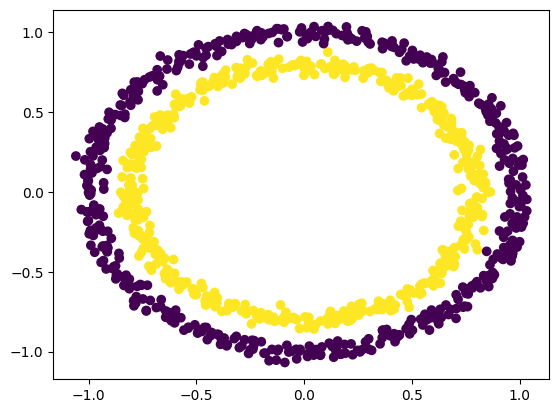

In [503]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y)

### Check input and output shapes

In [504]:
X.shape, y.shape

((1000, 2), (1000,))

In [505]:
X_sample=X[0]
y_sample=y[0]
print(f"Values for one sample of X: {X_sample} and same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and same for y: 1
Shapes for one sample of X: (2,) and for y: ()


### Turn data into tensors and create train test splits

In [506]:
import torch
from torch import nn

In [507]:
X.dtype

dtype('float64')

In [508]:
X=torch.from_numpy(X).type(torch.float) #torch expects float 32
y=torch.from_numpy(y).type(torch.float)

In [509]:
X.dtype, type(X)

(torch.float32, torch.Tensor)

In [510]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [511]:
#Split data into training and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [512]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

## Building a model

1. Device agnostic Code
2. Contruct a model
3. Define loss function
4. Create training and test loop

In [513]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [514]:
 #construct a model that subclasses nn.Module
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Linear layers capable of hndling shapes of our data
    self.layer1=nn.Linear(in_features=2, out_features=5)
    self.layer2=nn.Linear(in_features=5,out_features=1)
  #define a forward method that outlines forward pass
  def forward(self,x):
    return self.layer2(self.layer1(x))

#instanciate an instance of our model class
model0=CircleModel().to(device)
model0

CircleModel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [515]:
device

'cpu'

In [516]:
next(model0.parameters()).device

device(type='cpu')

In [517]:
#using nn.sequential()
model0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [518]:
model0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [519]:
untrained_preds=model0(X_test.to(device))
print(len(untrained_preds))
print(f"{len(X_test),} Shape {X_test.shape}")
print(f"First 10 predicrion: {torch.round(untrained_preds[:10])}")
print(f"First 10 labels: {y_test[:10]}")

200
(200,) Shape torch.Size([200, 2])
First 10 predicrion: tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], grad_fn=<RoundBackward0>)
First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [520]:
X_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### Setup Loss function and optimizer

In [521]:
# Loss Function
# loss_fn=nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation prior to input to BCELoss
loss_fn=nn.BCEWithLogitsLoss() #BCEWithLogitsLoss = sigmoid activation function built-in
optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.1)

In [522]:
#calculate accuracy
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

## Train the model

### Going from raw logits --> prediction prob --> prediction labels

our model outputs are going to be raw logits

we can convert these *logits* to prediction probabilities by passing them to some kind of activation function
(eg: sigmoid for binary classification softmax for multiclass classification)

Then by rounding them or taking argmax() it can be converted to pred probabilities

In [523]:
#view first 5 outputs of the forward pass on the test data
#without activation
model0.eval()
with torch.inference_mode():
  y_logits=model0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [524]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [525]:
#use the sigmoid activation on the logits
y_predprobs=torch.sigmoid(y_logits)
y_predprobs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

For prediction probability values we need to perform range style rounding on them:
y_predprob>=0.5, y=1 (class 1)
y_predprob<=0.5 y=0 (class 0)

In [526]:
#Find the predicted probabilities
y_pred = torch.round(y_predprobs)

#in full
y_pred_labels= torch.round(torch.sigmoid(model0(X_test.to(device))[:5]))
y_pred_labels

print(torch.eq(y_pred.squeeze(),y_pred_labels.squeeze()))

tensor([True, True, True, True, True])


 ### Building a training and testing loop

In [527]:
torch.manual_seed(42)
epochs=100
X_train, y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model0.train()
  # Forward Pass
  y_logits=model0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #Calculate loss/accuracy
  # loss=loss_fn(y_logits,y_train)#nn.BCELoss expects prediction probabilities as inputs
  loss=loss_fn(y_logits,y_train) ##nn.BCEWithLogits expects raw logits as input
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  #Loss backward
  loss.backward()

  #Optimizer step
  optimizer.step()

  #testing
  model0.eval()
  with torch.inference_mode():
    #forward pass
    test_logits=model0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    #calculate loss
    test_loss=loss_fn(test_logits,y_test)
    test_accu=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch%10 == 0 :
     print(f"Epoch: {epoch} | Loss: {loss: .5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} Test Accuracy: {test_accu:.2f}%")


Epoch: 0 | Loss:  0.69796, Acc: 51.88% | Test Loss: 0.69440 Test Accuracy: 58.00%
Epoch: 10 | Loss:  0.69590, Acc: 51.25% | Test Loss: 0.69305 Test Accuracy: 53.00%
Epoch: 20 | Loss:  0.69490, Acc: 51.62% | Test Loss: 0.69254 Test Accuracy: 49.50%
Epoch: 30 | Loss:  0.69435, Acc: 51.12% | Test Loss: 0.69236 Test Accuracy: 49.50%
Epoch: 40 | Loss:  0.69401, Acc: 50.88% | Test Loss: 0.69232 Test Accuracy: 51.00%
Epoch: 50 | Loss:  0.69378, Acc: 50.25% | Test Loss: 0.69234 Test Accuracy: 50.00%
Epoch: 60 | Loss:  0.69362, Acc: 50.00% | Test Loss: 0.69239 Test Accuracy: 51.50%
Epoch: 70 | Loss:  0.69351, Acc: 50.25% | Test Loss: 0.69246 Test Accuracy: 51.00%
Epoch: 80 | Loss:  0.69342, Acc: 49.88% | Test Loss: 0.69254 Test Accuracy: 50.00%
Epoch: 90 | Loss:  0.69336, Acc: 49.88% | Test Loss: 0.69262 Test Accuracy: 53.00%


## Make Predictions

It seems it is not learning, inspect using predictions

import a function called `plot_decision_boundary()`


In [528]:
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
  print("Helper function already exists, skipping download")
else:
  print("Downloading")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)
from helper_function import plot_predictions, plot_decision_boundary


Helper function already exists, skipping download


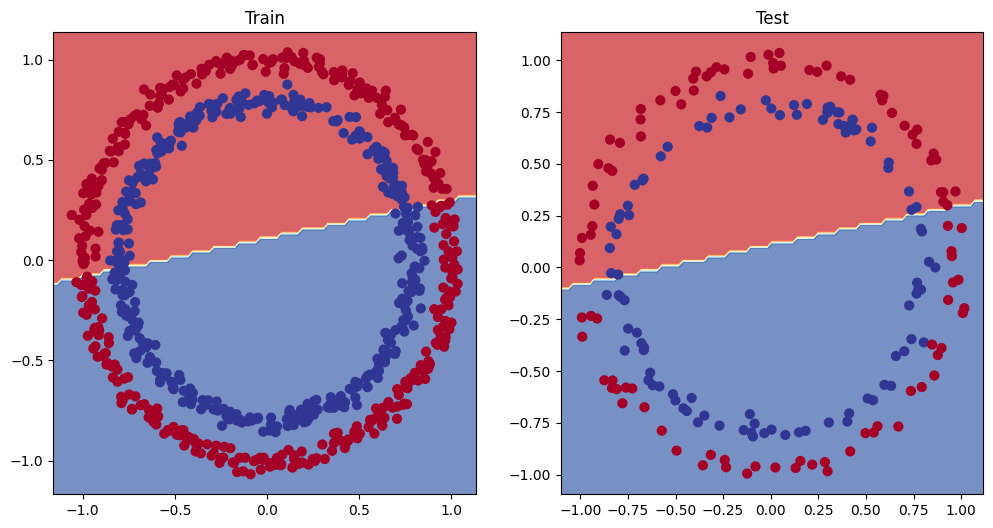

In [529]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model0,X_test,y_test)

## Improving a model (from model perspective)

Tune the hyperparameters

In [530]:
class circlemodel1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)
  def forward(self,x):
    # z=self.layer1(x)
    # z=self.layer2(z)
    # z=self.layer3(z)
    return self.layer3(self.layer2(self.layer1(x)))

model1=circlemodel1().to(device)
model1



circlemodel1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [531]:
#loss function
lossfn = nn.BCEWithLogitsLoss()

#optimizer
optimizer=torch.optim.SGD(model1.parameters(),lr=0.1)


In [532]:
torch.manual_seed(42)

epochs=1000


X_train,y_train,X_test,y_test=X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model1.train()
  #forward pass
  y_logits=model1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #calculate loss
  loss=lossfn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #optimizer
  optimizer.step()

  #Testing
  model1.eval()
  with torch.inference_mode():
    test_logits=model1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    #loss
    test_loss=lossfn(test_logits,y_test)
    test_accu=accuracy_fn(y_true=y_test,y_pred=test_pred)
    if epoch%100==0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f} Test acc: {test_accu:.2f}%")

Epoch: 0 | Loss: 0.69396, Acc: 50.88 | Test loss: 0.69261 Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38 | Test loss: 0.69379 Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12 | Test loss: 0.69437 Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62 | Test loss: 0.69458 Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12 | Test loss: 0.69465 Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69467 Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468 Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468 Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468 Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468 Test acc: 46.00%


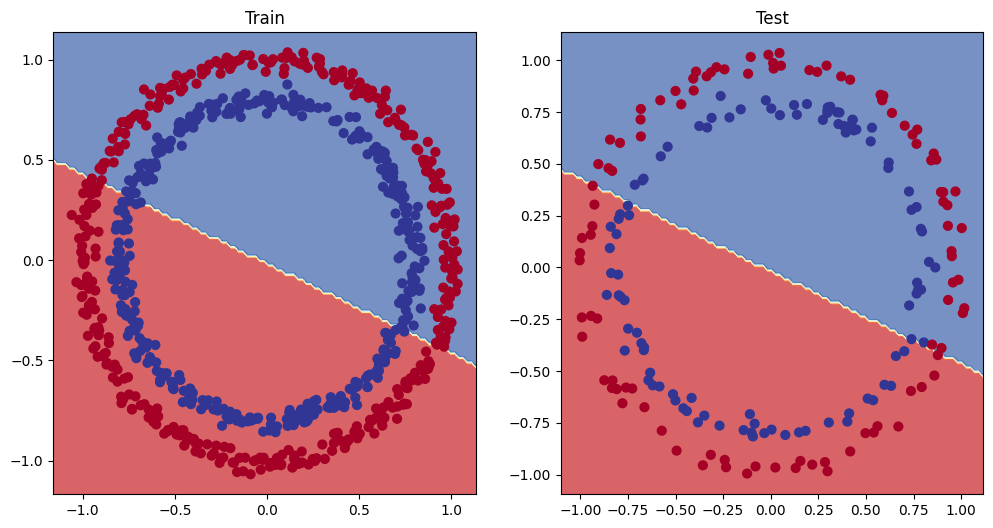

In [533]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model1,X_test,y_test)

### If the model can fit a straight line

In [534]:
weight=0.7
bias=0.3
start=0
end=1
step=0.01

X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias

print(len(X_regression))
X_regression[:5]

100


tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400]])

In [535]:
trainsplit=int(0.8*len(X_regression))
X_train_regression,y_train_regression=X_regression[:trainsplit],y_regression[:trainsplit]
X_test_regression, y_test_regression = X_regression[trainsplit:], y_regression[trainsplit:]

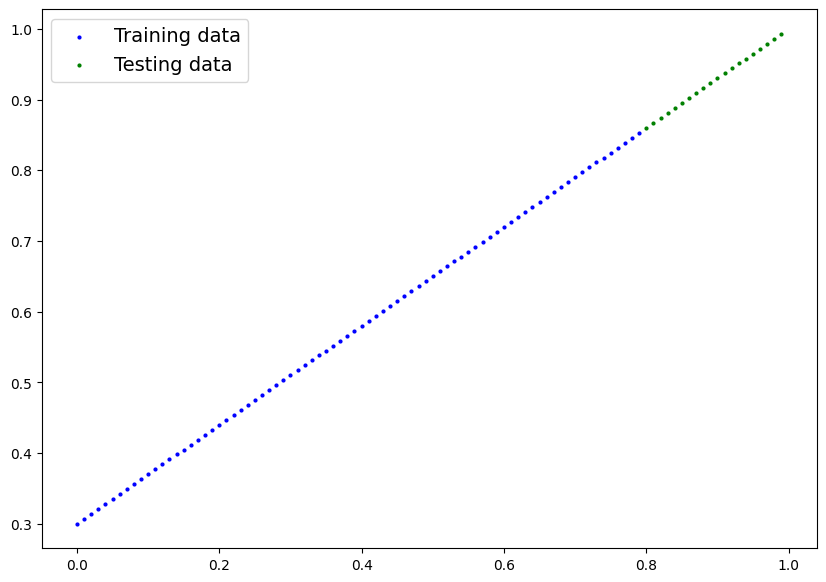

In [536]:
plot_predictions(train_data=X_train_regression,train_labels=y_train_regression,
                 test_data=X_test_regression,test_labels=y_test_regression)

### Adjust model1 for straight line

In [537]:
model2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
)
model2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [538]:
lossfn=nn.L1Loss()
optimizer=torch.optim.SGD(model2.parameters(),lr=0.1)

In [539]:
#Train model
torch.manual_seed(42)

epochs=1000

for epoch in range(epochs):
  ypred=model2(X_train_regression)
  loss=lossfn(ypred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model2.eval()
  with torch.inference_mode():
    test_pred=model2(X_test_regression)
    test_loss=lossfn(test_pred,y_test_regression)

  if epoch%100==0 :
    print(f"epoch: {epoch} | Loss: {loss:.5f}| Testloss = {test_loss:.5f}")



epoch: 0 | Loss: 0.75986| Testloss = 0.54143
epoch: 100 | Loss: 0.09309| Testloss = 0.02901
epoch: 200 | Loss: 0.07376| Testloss = 0.02850
epoch: 300 | Loss: 0.06745| Testloss = 0.00615
epoch: 400 | Loss: 0.06107| Testloss = 0.02004
epoch: 500 | Loss: 0.05698| Testloss = 0.01061
epoch: 600 | Loss: 0.04857| Testloss = 0.01326
epoch: 700 | Loss: 0.06109| Testloss = 0.02127
epoch: 800 | Loss: 0.05600| Testloss = 0.01425
epoch: 900 | Loss: 0.05571| Testloss = 0.00603


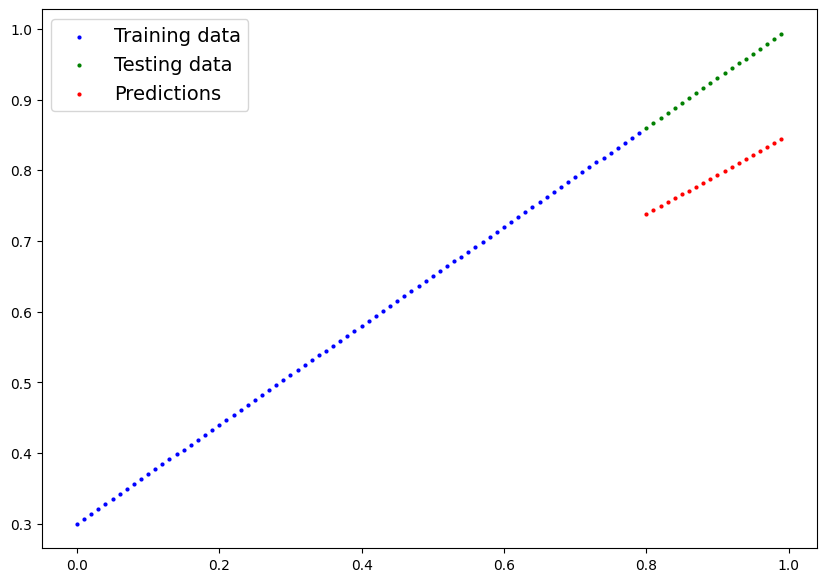

In [540]:
model2.eval()
with torch.inference_mode():
  ypreds=model2(X_test_regression)
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression,test_data=X_test_regression,test_labels=y_test_regression,
                 predictions=ypreds)

## Non Linearity

### Recreating nonlinear data

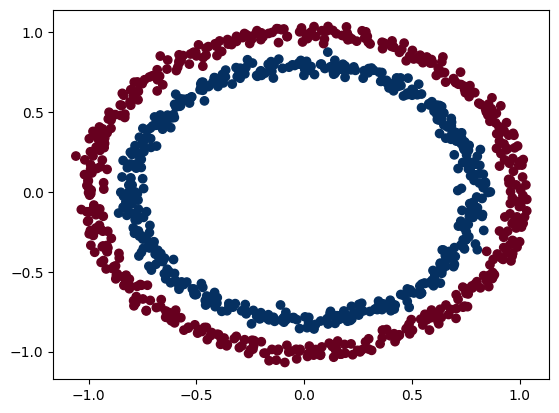

In [541]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdBu)

In [542]:
# Convert data to train and test splits

import torch
from sklearn.model_selection import train_test_split

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train[:5], y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### building a model with nonlinearity

In [543]:
from torch import nn
class circlemodelv2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x):
      return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model3=circlemodelv2()
model3

circlemodelv2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [544]:
# Loss and optimizer
lossfn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model3.parameters(),lr=0.1)

In [545]:
### Training a model
torch.manual_seed(42)

epochs=5000
for epoch in range(epochs):
  model3.train()
  ylogits=model3(X_train).squeeze()
  ypred=torch.round(torch.sigmoid(ylogits))

  loss=lossfn(ylogits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=ypred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model3.eval()
  with torch.inference_mode():
    test_logits=model3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=lossfn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch%100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.4f}")



Epoch: 0 | Loss: 0.6929 | Acc: 50.0000
Epoch: 100 | Loss: 0.6912 | Acc: 52.8750
Epoch: 200 | Loss: 0.6898 | Acc: 53.3750
Epoch: 300 | Loss: 0.6879 | Acc: 53.0000
Epoch: 400 | Loss: 0.6852 | Acc: 52.7500
Epoch: 500 | Loss: 0.6810 | Acc: 52.7500
Epoch: 600 | Loss: 0.6751 | Acc: 54.5000
Epoch: 700 | Loss: 0.6666 | Acc: 58.3750
Epoch: 800 | Loss: 0.6516 | Acc: 64.0000
Epoch: 900 | Loss: 0.6236 | Acc: 74.0000
Epoch: 1000 | Loss: 0.5682 | Acc: 87.7500
Epoch: 1100 | Loss: 0.4815 | Acc: 93.5000
Epoch: 1200 | Loss: 0.3706 | Acc: 97.7500
Epoch: 1300 | Loss: 0.2546 | Acc: 99.0000
Epoch: 1400 | Loss: 0.1718 | Acc: 99.5000
Epoch: 1500 | Loss: 0.1219 | Acc: 99.6250
Epoch: 1600 | Loss: 0.0912 | Acc: 99.8750
Epoch: 1700 | Loss: 0.0710 | Acc: 99.8750
Epoch: 1800 | Loss: 0.0577 | Acc: 99.8750
Epoch: 1900 | Loss: 0.0485 | Acc: 99.8750
Epoch: 2000 | Loss: 0.0418 | Acc: 99.8750
Epoch: 2100 | Loss: 0.0363 | Acc: 99.8750
Epoch: 2200 | Loss: 0.0320 | Acc: 99.8750
Epoch: 2300 | Loss: 0.0287 | Acc: 99.8750
Epoc

### Evaluating a model with non-linear activation function

In [546]:
#Makes predictions
model3.eval()
with torch.inference_mode():
  ypreds=torch.round(torch.sigmoid(model3(X_test)))
ypreds[:10], y_test[:10]

(tensor([[1.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

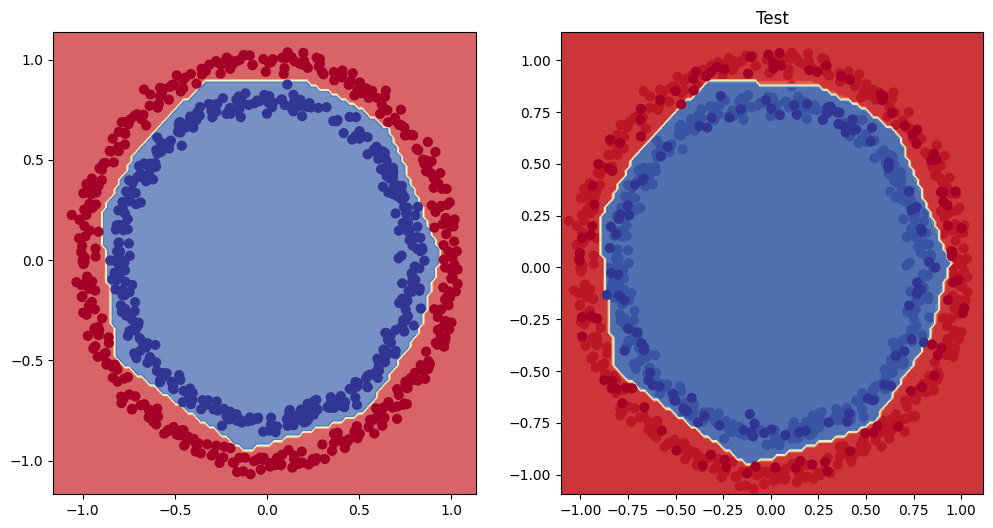

In [547]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model3,X_train,y_train)

plt.subplot(1,2,2)
plot_decision_boundary(model3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model3,X_test,y_test)

## Replicating a non-linear activation functions
NN, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own
These tools are linear and non-linear functions

In [548]:
#create a tensor
A=torch.arange(-10,10,1,dtype=torch.float32)

In [549]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

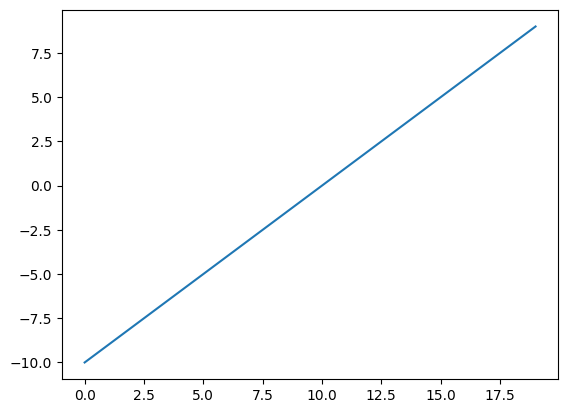

In [550]:
plt.plot(A)

In [551]:
def relu(x:torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

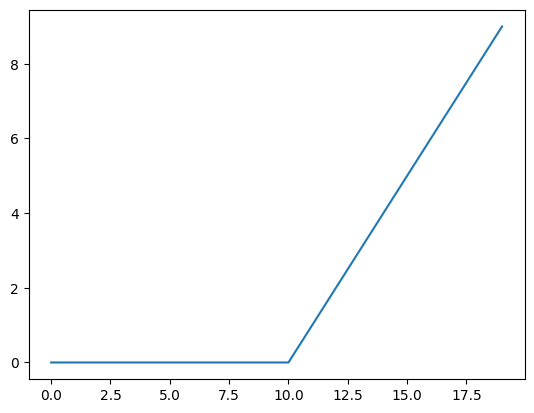

In [552]:
plt.plot(relu(A))

In [553]:
#sigmoid
def sigmoid(x):
  return 1 / (1+torch.exp(-x))

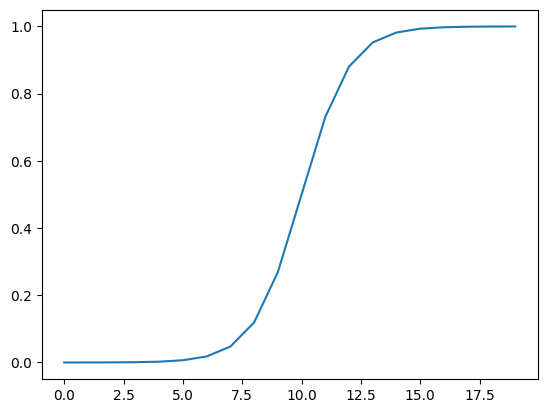

In [554]:
plt.plot(torch.sigmoid(A))

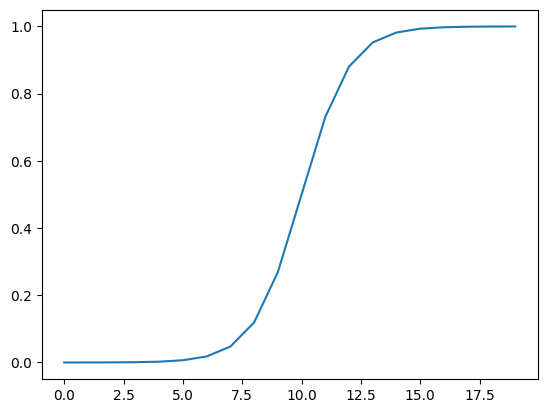

In [555]:
plt.plot(sigmoid(A))

In [556]:
## Multiclass classification problem

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


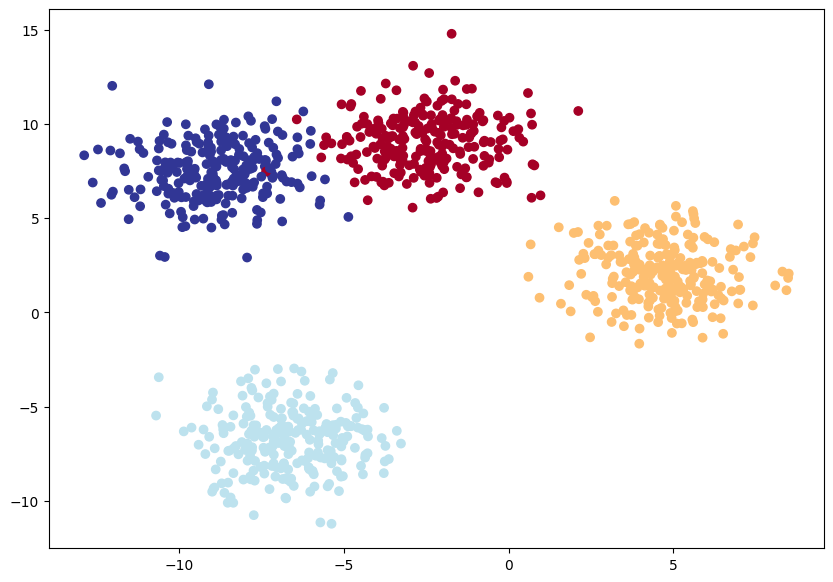

In [557]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED=42

X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES,centers=NUM_CLASSES,cluster_std=1.5,random_state=RANDOM_SEED)

#Turn data into tensors
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

#Split into train and test
X_blob_train, X_blob_test,y_blob_train,y_blob_test=train_test_split(X_blob,y_blob,test_size=0.2,random_state=RANDOM_SEED)

#Plot
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

### Multi class classification

In [558]:
#device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [559]:
class blobmodel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )

  def forward(self,x):
      return self.linear_layer_stack(x)
model4=blobmodel(input_features=2,output_features=4,hidden_units=8).to(device)
model4

blobmodel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [560]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [561]:
#loss function and optimizer
lossfn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model4.parameters(),lr=0.1)


In [562]:
model4.eval()
with torch.inference_mode():
  y_logits=model4(X_blob_test.to(device))
ylogits[:10]

tensor([  6.3371,  -5.8910,  -8.7242,  -6.9359,   6.8896,  -3.6936,   8.2867,
          8.3453,  -7.2554, -12.7503], grad_fn=<SliceBackward0>)

In [563]:
 # training loop
y_pred_probs=torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [564]:
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [565]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [566]:
#creating training and testing loop
torch.manual_seed(42)
epochs=100
X_blob_train,y_blob_train=X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test=X_blob_test.to(device),y_blob_test.to(device)

for epoch in range(epochs):
  model4.train()
  y_logits=model4(X_blob_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)

  # print(y_logits.shape, y_blob_train.shape)
  loss=lossfn(y_logits,y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model4.eval()
  with torch.inference_mode():
    test_logits=model4(X_blob_test)
    test_preds = torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss=lossfn(test_logits,y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test,y_pred=test_preds)

    if epoch%10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test Loss: {test_loss:.4f}, Test acc: {test_acc}")




Epoch: 0 | Loss: 1.0432, Acc: 65.50 | Test Loss: 0.5786, Test acc: 95.5
Epoch: 10 | Loss: 0.1440, Acc: 99.12 | Test Loss: 0.1304, Test acc: 99.0
Epoch: 20 | Loss: 0.0806, Acc: 99.12 | Test Loss: 0.0722, Test acc: 99.5
Epoch: 30 | Loss: 0.0592, Acc: 99.12 | Test Loss: 0.0513, Test acc: 99.5
Epoch: 40 | Loss: 0.0489, Acc: 99.00 | Test Loss: 0.0410, Test acc: 99.5
Epoch: 50 | Loss: 0.0429, Acc: 99.00 | Test Loss: 0.0349, Test acc: 99.5
Epoch: 60 | Loss: 0.0391, Acc: 99.00 | Test Loss: 0.0308, Test acc: 99.5
Epoch: 70 | Loss: 0.0364, Acc: 99.00 | Test Loss: 0.0280, Test acc: 99.5
Epoch: 80 | Loss: 0.0345, Acc: 99.00 | Test Loss: 0.0259, Test acc: 99.5
Epoch: 90 | Loss: 0.0330, Acc: 99.12 | Test Loss: 0.0242, Test acc: 99.5


In [567]:
#loss function and optimizer
lossfn=nn.CrossEntropyLoss() # Ensure this is set for multiclass
optimizer=torch.optim.SGD(params=model4.parameters(),lr=0.1)

#creating training and testing loop
torch.manual_seed(42)
epochs=100
# X_blob_train,y_blob_train=X_blob_train.to(device),y_blob_train.to(device) # Keep data on CPU for simplicity with this model
# X_blob_test,y_blob_test=X_blob_test.to(device),y_blob_test.to(device)

for epoch in range(epochs):
  model4.train()
  y_logits=model4(X_blob_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)

  # The print below shows the shapes which caused the error if the loss function was BCEWithLogitsLoss
  # print(y_logits.shape, y_blob_train.shape)

  # Calculate loss with CrossEntropyLoss
  loss=lossfn(y_logits,y_blob_train) # This now uses CrossEntropyLoss, which accepts (N, C) and (N)

  # Calculate accuracy (ensure y_pred and y_true are on the same device for accuracy_fn if you move data to device)
  acc=accuracy_fn(y_true=y_blob_train,y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model4.eval()
  with torch.inference_mode():
    test_logits=model4(X_blob_test)
    test_preds = torch.softmax(test_logits,dim=1).argmax(dim=1)
    # Calculate test loss with CrossEntropyLoss
    test_loss=lossfn(test_logits,y_blob_test)
    # Calculate test accuracy (ensure test_preds and y_blob_test are on the same device)
    test_acc=accuracy_fn(y_true=y_blob_test,y_pred=test_preds) # Use test_preds here

    if epoch%10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test Loss: {test_loss:.4f}, Test acc: {test_acc:.2f}") # Add .2f for formatting test_acc

Epoch: 0 | Loss: 0.0318, Acc: 99.12 | Test Loss: 0.0229, Test acc: 99.50
Epoch: 10 | Loss: 0.0309, Acc: 99.12 | Test Loss: 0.0219, Test acc: 99.50
Epoch: 20 | Loss: 0.0302, Acc: 99.12 | Test Loss: 0.0210, Test acc: 99.50
Epoch: 30 | Loss: 0.0295, Acc: 99.12 | Test Loss: 0.0202, Test acc: 99.50
Epoch: 40 | Loss: 0.0290, Acc: 99.12 | Test Loss: 0.0196, Test acc: 99.50
Epoch: 50 | Loss: 0.0286, Acc: 99.12 | Test Loss: 0.0190, Test acc: 99.50
Epoch: 60 | Loss: 0.0282, Acc: 99.12 | Test Loss: 0.0185, Test acc: 99.50
Epoch: 70 | Loss: 0.0279, Acc: 99.12 | Test Loss: 0.0181, Test acc: 99.50
Epoch: 80 | Loss: 0.0276, Acc: 99.12 | Test Loss: 0.0177, Test acc: 99.50
Epoch: 90 | Loss: 0.0273, Acc: 99.12 | Test Loss: 0.0174, Test acc: 99.50


In [570]:
# Making pred
model4.eval()
with torch.inference_mode():
  y_logits=model4(X_blob_test)
y_logits[:10]

tensor([[  5.4442,  13.0433, -17.8281, -11.7554],
        [  5.8881, -15.1900,   4.2523,  12.8026],
        [ -7.2237, -16.6245,  24.9489,  15.1842],
        [  2.3119,   9.5723, -10.3641,  -8.4612],
        [  9.9316,   4.0661, -17.2846,  -4.3220],
        [  6.5411, -18.8753,   6.2477,  15.9568],
        [ -7.6444, -12.6423,  22.3681,  11.7513],
        [  8.6298,  -1.0190, -11.2484,   0.2204],
        [ -7.3196, -23.2464,  30.4257,  20.9614],
        [  8.9504,   0.8413, -13.2247,  -1.4279]])

In [571]:
y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[5.0068e-04, 9.9950e-01, 3.9133e-14, 1.6977e-11],
        [9.9218e-04, 6.9579e-13, 1.9327e-04, 9.9881e-01],
        [1.0656e-14, 8.8080e-19, 9.9994e-01, 5.7445e-05],
        [7.0234e-04, 9.9930e-01, 2.1948e-09, 1.4717e-08],
        [9.9717e-01, 2.8276e-03, 1.5098e-12, 6.4342e-07],
        [8.1430e-05, 7.4572e-16, 6.0720e-05, 9.9986e-01],
        [9.2416e-14, 6.2397e-16, 9.9998e-01, 2.4502e-05],
        [9.9971e-01, 6.4487e-05, 2.3274e-09, 2.2269e-04],
        [4.0492e-17, 4.9029e-24, 9.9992e-01, 7.7562e-05],
        [9.9967e-01, 3.0068e-04, 2.3406e-10, 3.1089e-05]])

In [573]:
y_preds=torch.argmax(y_pred_probs,dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

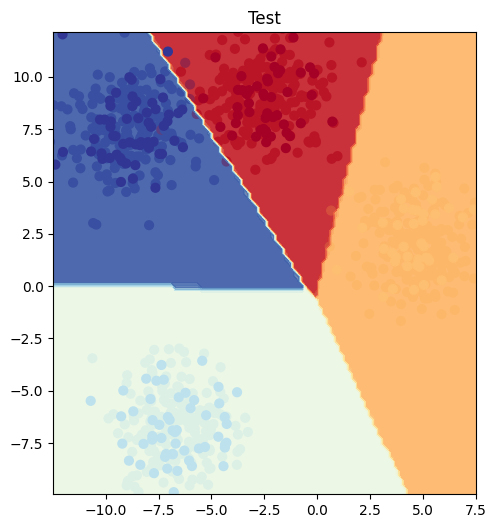

In [574]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model4,X_blob_train,y_blob_train)
plt.title("Test")
plot_decision_boundary(model4,X_blob_test,y_blob_test)